In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

[[ 1  1  1 ...  1  1 19]
 [ 1  1  1 ...  1  1 21]
 [ 1  1  1 ...  1  1 18]
 ...
 [ 1  1  1 ...  1  1 18]
 [ 1  1  1 ...  1  1 21]
 [12 18 14 ... 17 19 34]]


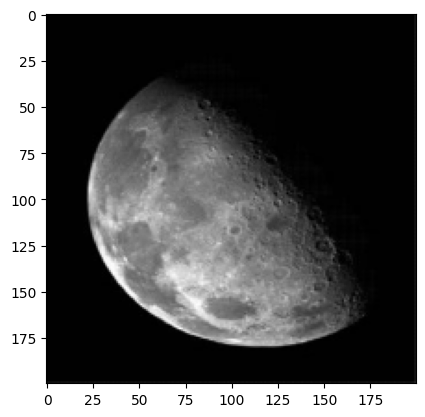

In [2]:
# load an image into a matrix
path = "../Images/moon.jpg"
img = cv2.imread(path, 0)

# resize the image to 200x200
img = cv2.resize(img, (200, 200))
print(img)

# display the image
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

# Laplacian Sharpening

LAPLACIAN SHAPRENING


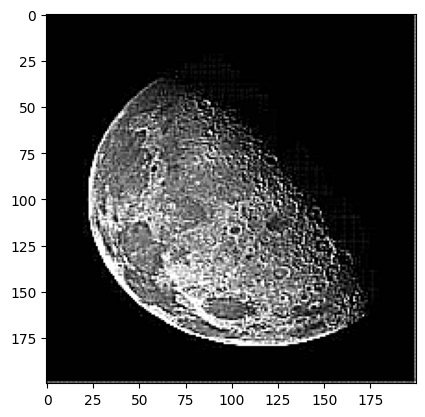

array([[  1,   1,   1, ...,   1,   0, 123],
       [  1,   1,   1, ...,   1,   0, 146],
       [  1,   1,   1, ...,   1,   0, 114],
       ...,
       [  1,   1,   1, ...,   1,   0, 114],
       [  0,   0,   0, ...,   0,   0,  95],
       [ 66, 130,  86, ..., 114,  74, 222]], dtype=uint8)

In [21]:
def sharpen(img):
    print("LAPLACIAN SHAPRENING")
    # create a sharpening filter
    # kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

    # apply the sharpening filter
    img_sharpen = cv2.filter2D(img, -1, kernel)

    # display the sharpened image
    plt.imshow(img_sharpen, cmap='gray', vmin=0, vmax=255)
    plt.show()

    return img_sharpen

sharpen(img)

# Unsharp Masking

AVERAGING FILTER


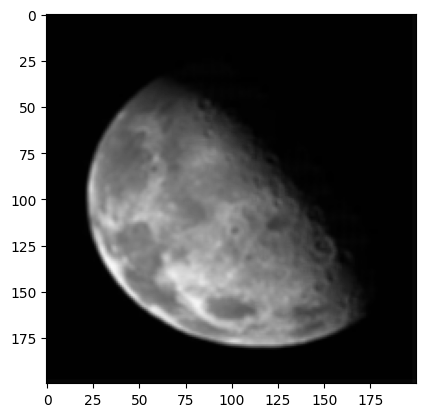

array([[ 1,  1,  1, ...,  1,  7,  7],
       [ 1,  1,  1, ...,  1,  7,  7],
       [ 1,  1,  1, ...,  1,  7,  7],
       ...,
       [ 1,  1,  1, ...,  1,  7,  7],
       [ 6,  6,  6, ...,  6, 13, 13],
       [ 6,  6,  6, ...,  6, 13, 13]], dtype=uint8)

In [22]:
def averaging(img, kernel_size):
    print("AVERAGING FILTER")
    # create an averaging filter
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

    # apply the averaging filter
    img_avg = cv2.filter2D(img, -1, kernel)

    # display the blurred image
    plt.imshow(img_avg, cmap='gray', vmin=0, vmax=255)
    plt.show()

    return img_avg

averaging(img, 3)

AVERAGING FILTER


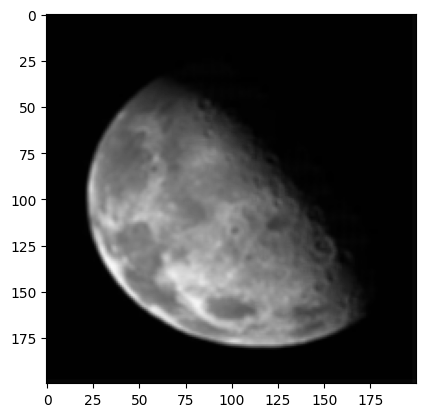

UNSHARP MASKING


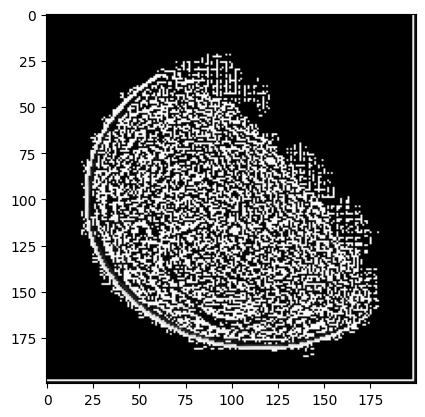

array([[  0,   0,   0, ...,   0, 250,  12],
       [  0,   0,   0, ...,   0, 250,  14],
       [  0,   0,   0, ...,   0, 250,  11],
       ...,
       [  0,   0,   0, ...,   0, 250,  11],
       [251, 251, 251, ..., 251, 244,   8],
       [  6,  12,   8, ...,  11,   6,  21]], dtype=uint8)

In [26]:
def unsharp_masking(img, kernel):
    unsharp_masked_img = img - averaging(img, kernel)
    
    # display the image
    print("UNSHARP MASKING")
    plt.imshow(unsharp_masked_img, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    return unsharp_masked_img

# sharp_img = sharpen(img)
unsharp_masking(img, 3)